In [108]:
import numpy as np
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [109]:
df = pd.read_csv('dataset.csv')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [111]:
df_getdummy = pd.get_dummies(data=df, columns=['protocol_type', 'service', 'flag', 'class'])

In [112]:
df_getdummy.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3',
       'flag_SF', 'flag_SH', 'class_anomaly', 'class_normal'],
      dtype='object', length=120)

In [113]:
df_getdummy=df_getdummy.fillna(value=0) #NA
df_getdummy.pop('class_normal')

0        1
1        1
2        0
3        1
4        1
        ..
25187    0
25188    0
25189    0
25190    0
25191    0
Name: class_normal, Length: 25192, dtype: uint8

In [114]:
X_len=len(df_getdummy.columns)-1
y_len=len(df_getdummy.columns)-1
X=df_getdummy.iloc[:,0:X_len]
y=df_getdummy.iloc[:,y_len]

In [115]:
k=10 #number of fold for cross validation
num_val_samples=len(X)//10
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_samples_leaf = 5)

In [116]:
#confusion matrix for each fold
accuracy_s=[]
precision_rate_s=[]
recall_rate_s=[]
f1_score_s=[]

In [117]:
for i in range(k): #k-fold
    print('처리중인 폴드 #',i+1)
    
    #Ready for Test Set
    val_data=X[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=y[i*num_val_samples:(i+1)*num_val_samples]
    
    #Ready for Training Set
    partial_train_data=np.concatenate([X[:i*num_val_samples],
    X[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets=np.concatenate([y[:i*num_val_samples],
    y[(i+1)*num_val_samples:]],axis=0)
    
    #Fitting DT to the Training Set
    dtree.fit(partial_train_data, partial_train_targets)
    
    y_pred=dtree.predict(val_data)
    
    #confusion matrix for each fold
    cm=confusion_matrix(val_targets, y_pred)
    
    accuracy=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[1][0]+cm[0][1])
    precision_rate=cm[1][1]/(cm[1][1]+cm[0][1])
    recall_rate=cm[1][1]/(cm[1][1]+cm[1][0])
    f1_score=cm[1][1]/(cm[1][1]+(cm[1][0]+cm[0][1])/2)
    
    accuracy_s.append(accuracy)
    precision_rate_s.append(precision_rate)
    recall_rate_s.append(recall_rate)
    f1_score_s.append(f1_score)
    
    #confusion matrix for each fold
    print('#', i+1,'폴드의 confusion matrix는 다음과 같습니다')
    print('Confusion Matrix : \n',cm)
    print()

처리중인 폴드 # 1
# 1 폴드의 confusion matrix는 다음과 같습니다
Confusion Matrix : 
 [[1271   48]
 [  34 1166]]

처리중인 폴드 # 2
# 2 폴드의 confusion matrix는 다음과 같습니다
Confusion Matrix : 
 [[1319   30]
 [  28 1142]]

처리중인 폴드 # 3
# 3 폴드의 confusion matrix는 다음과 같습니다
Confusion Matrix : 
 [[1325   31]
 [  18 1145]]

처리중인 폴드 # 4
# 4 폴드의 confusion matrix는 다음과 같습니다
Confusion Matrix : 
 [[1273   32]
 [  26 1188]]

처리중인 폴드 # 5
# 5 폴드의 confusion matrix는 다음과 같습니다
Confusion Matrix : 
 [[1331   28]
 [  33 1127]]

처리중인 폴드 # 6
# 6 폴드의 confusion matrix는 다음과 같습니다
Confusion Matrix : 
 [[1325   38]
 [  24 1132]]

처리중인 폴드 # 7
# 7 폴드의 confusion matrix는 다음과 같습니다
Confusion Matrix : 
 [[1284   47]
 [  26 1162]]

처리중인 폴드 # 8
# 8 폴드의 confusion matrix는 다음과 같습니다
Confusion Matrix : 
 [[1361   30]
 [  28 1100]]

처리중인 폴드 # 9
# 9 폴드의 confusion matrix는 다음과 같습니다
Confusion Matrix : 
 [[1293   44]
 [  27 1155]]

처리중인 폴드 # 10
# 10 폴드의 confusion matrix는 다음과 같습니다
Confusion Matrix : 
 [[1308   31]
 [  24 1156]]



In [118]:
#average of 10 folds
print('accuracy : ' , np.mean(accuracy_s))
print('precision : ' , np.mean(precision_rate_s))
print('recall rate : ', np.mean(recall_rate_s))
print('f1 score : ', np.mean(f1_score_s))

accuracy :  0.9751091703056769
precision :  0.9697315623106497
recall rate :  0.9771741663577161
f1 score :  0.9734286268678393


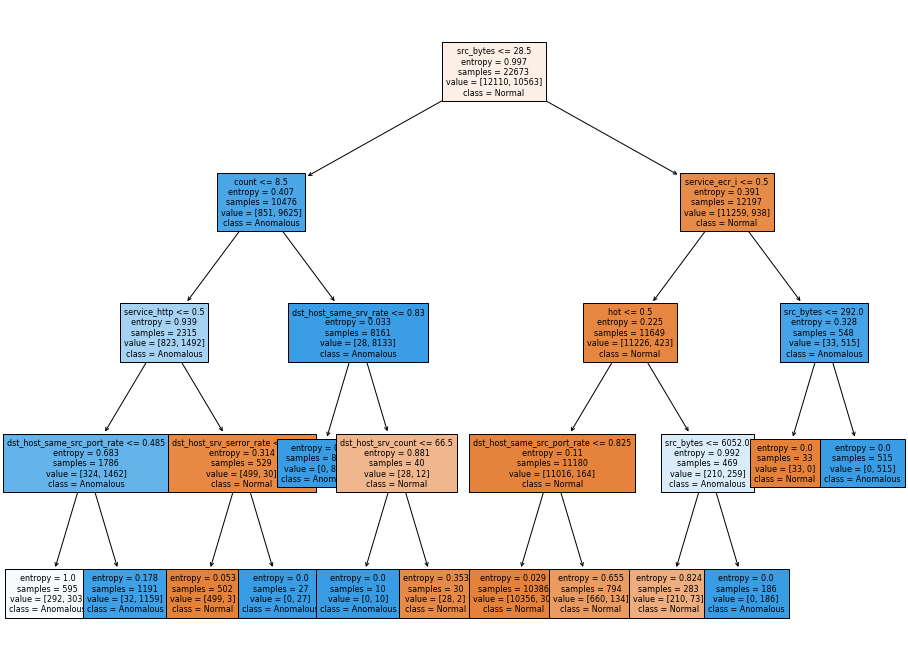

In [119]:
#DT at last fold
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree, feature_names=df_getdummy.columns, fontsize=8, filled=True, class_names=['Normal', 'Anomalous'])